<a href="https://colab.research.google.com/github/Sam-1806/Drug_pred/blob/main/drugQ_and_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
shortcut_path = '/content/drive/MyDrive/data'

In [5]:
import pandas as pd

In [6]:
dtype_dict = {'drugName': str, 'condition': str, 'review': str}
train_data = pd.read_csv('/content/drive/MyDrive/data/train.csv', dtype=dtype_dict)
test_data = pd.read_csv('/content/drive/MyDrive/data/test.csv', dtype=dtype_dict)
ground_truth = pd.read_excel('/content/drive/MyDrive/data/model_evaluation.xlsx')

In [7]:
print("Train Dataset:")
print(train_data.info())

print("\nTest Dataset:")
print(test_data.info())

Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161296 entries, 0 to 161295
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uniqueID   1993 non-null   float64
 1   drugName   1999 non-null   object 
 2   condition  1988 non-null   object 
 3   review     1991 non-null   object 
dtypes: float64(1), object(3)
memory usage: 4.9+ MB
None

Test Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1998 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB
None


**Q1: What preprocessing steps would you perform on the train dataset before using it for modelling?**

Text Cleaning: Remove special characters, punctuation, and unnecessary whitespaces.
Lowercasing: Convert text to lowercase for uniformity.
Tokenization: Break text into words or subwords for analysis.
Stopword Removal: Remove common words that do not contribute much to meaning.

**Q2: Are there any missing values in the dataset? If yes, what is the nature of missing values and how might this affect model performance? What are some techniques to mitigate this issue?**


In [8]:
null_counts = train_data.isnull().sum()

# Display the number of null values for each column
print("Number of Null Values:")
print(null_counts)

Number of Null Values:
uniqueID     159303
drugName     159297
condition    159308
review       159305
dtype: int64


Missing values might impact model training as it relies on complete data.
Techniques to mitigate: Impute missing values using methods like mean imputation or drop rows/columns with missing values.

**Q4: Do you see any potential features in the review column that could be useful for predicting the drug name and condition?**

*   Sentiment Analysis: Extract sentiment polarity.
*   Keyword Extraction: Identify important words or phrases.
*   Named Entity Recognition: Recognize entities related to drugs and conditions.

**Q5: Can you provide some statistics and visualizations to summarize the distribution of categories (drug name)?**

Statistics: Count of unique drug names, distribution of drug names.
Visualization: Bar chart showing the frequency of each drug name.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

drug_name_distribution = train_data['drugName'].value_counts()

# Statistics
unique_drug_names_count = len(drug_name_distribution)
most_frequent_drug_name = drug_name_distribution.idxmax()
count_most_frequent_drug_name = drug_name_distribution.max()

print(f"Number of Unique Drug Names: {unique_drug_names_count}")
print(f"Most Frequent Drug Name: {most_frequent_drug_name}")
print(f"Count of Most Frequent Drug Name: {count_most_frequent_drug_name}")

Number of Unique Drug Names: 717
Most Frequent Drug Name: Etonogestrel
Count of Most Frequent Drug Name: 48


In [9]:
print("Unique values in 'drugName' column:", train_data['drugName'].unique())

Unique values in 'drugName' column: ['Valsartan' 'Guanfacine' 'Lybrel' 'Ortho Evra' 'Buprenorphine / naloxone'
 'Cialis' 'Levonorgestrel' 'Aripiprazole' 'Keppra'
 'Ethinyl estradiol / levonorgestrel' 'Topiramate' 'L-methylfolate'
 'Pentasa' 'Dextromethorphan' 'Nexplanon' 'Liraglutide' 'Trimethoprim'
 'Amitriptyline' 'Lamotrigine' 'Nilotinib' 'Atripla' 'Trazodone'
 'Etonogestrel' 'Etanercept' 'Tioconazole' 'Azithromycin' 'Eflornithine'
 'Daytrana' 'Ativan' 'Imitrex' 'Sertraline' 'Toradol' 'Viberzi' 'Mobic'
 'Dulcolax' 'Morphine' 'MoviPrep' 'Trilafon' 'Fluconazole' 'Contrave'
 'Clonazepam' 'Metaxalone' 'Venlafaxine' 'Ledipasvir / sofosbuvir'
 'Symbyax' 'Tamsulosin' 'Doxycycline' 'Dulaglutide' 'Intuniv'
 'Buprenorphine' 'Qvar' 'Opdivo' 'Pyridium' 'Latuda' 'Bupropion'
 'Implanon' 'Effexor XR' 'Drospirenone / ethinyl estradiol' 'NuvaRing'
 'Prepopik' 'Tretinoin' 'Gildess Fe 1 / 20'
 'Ethinyl estradiol / norgestimate' 'Elbasvir / grazoprevir' 'Clomiphene'
 'Docusate / senna' 'Amitiza' 'Silde

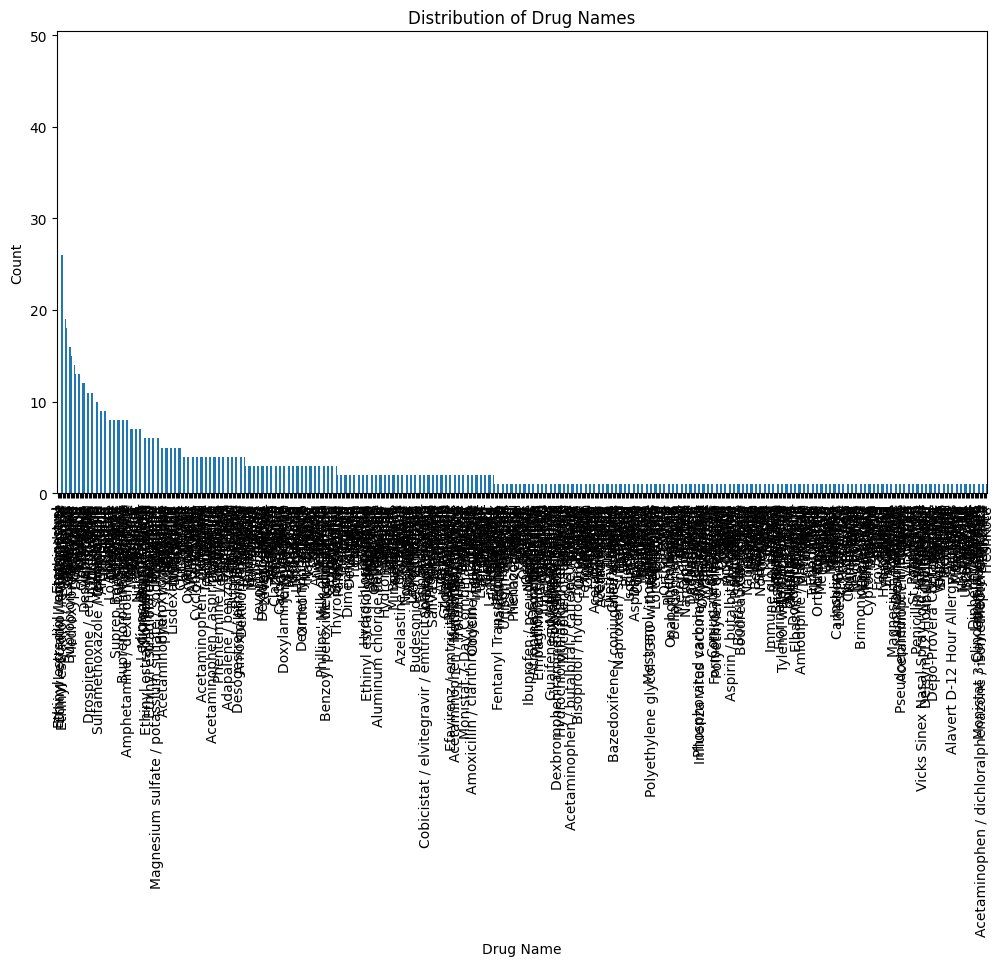

In [12]:
# Visualization
plt.figure(figsize=(12, 6))
drug_name_distribution.plot(kind='bar')
plt.title('Distribution of Drug Names')
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.show()

**Q6: Are there classes which are underrepresented or overrepresented? How might this skew the model’s prediction?**

Imbalanced classes may lead to biased predictions, as the model may favor the majority class.

In [13]:
drug_name_distribution = train_data['drugName'].value_counts()
# Print counts for each drug name
print("Class Imbalance - Counts for Each Drug Name:")
print(drug_name_distribution)


Class Imbalance - Counts for Each Drug Name:
Etonogestrel                                                 48
Levonorgestrel                                               43
Ethinyl estradiol / norethindrone                            30
Ethinyl estradiol / norgestimate                             26
Ethinyl estradiol / levonorgestrel                           26
                                                             ..
Methyl salicylate                                             1
Acetaminophen / dichloralphenazone / isometheptene mucate     1
Tecfidera                                                     1
Norflex                                                       1
FreshKote                                                     1
Name: drugName, Length: 717, dtype: int64


**Q7: What are some techniques that can be used to address this? Does the model performance improve after incorporating such strategies?**

-Techniques: Resampling methods (oversampling minority, undersampling majority), using different evaluation metrics.

-Improvement: Addressing class imbalance can enhance model performance, especially for minority classes.


**Q8: What Modeling strategy would you consider for predicting the drug name from the dataset and why?**

Consider using pre-trained language models like BERT for text classification tasks.
Transfer learning helps leverage knowledge from large pre-trained models.

**Q9: How can we assess model robustness (Cross Validation Strategies)?**

Employ k-fold cross-validation to assess the model's performance across different subsets of the data.
Helps ensure the model generalizes well to unseen data.

**Q10: What evaluation metrics would you use to assess the performance of your model?**

For multi-class classification: Accuracy, precision, recall, F1-score.
Considering the context, additional metrics like confusion matrix may also be relevant.

**Q11: What considerations would you have for deploying this model in a production environment?**

Model Size: Consider the size of the model for deployment efficiency.

Inference Speed: Optimize for fast inference.

Continuous Monitoring: Monitor model performance and update as needed.

Privacy: Ensure compliance with privacy regulations.